## Name: Rahul Singh

#### Email ID: rahul.nps12@gmail.com
 -----------------------------------------------

### Task 3  To Explore Unsupervised Machine Learning  

#### From the given `‘Iris’` dataset, predict the optimum number of clusters and represent it visually.

###### Import all the required libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Load the iris dataset
iris = pd.read_csv('iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


###### Explore the iris dataset

In [3]:
iris_df = iris.drop('Id',axis=1) # Remove the Id column from dataset.

In [4]:
iris_df.head() # See the first 5 rows

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris_df.tail() # See the last 5 rows

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
iris_df.shape # Return a tuple representing the dimensionality of the DataFrame.

(150, 5)

In [7]:
iris_df.info() # TO print a concise summary of a DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
iris_df.describe() # To view some basic statistical details

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
iris_df.columns # The column labels of the iris DataFrame.

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [10]:
iris_df.isnull().sum() # detect missing values in the given dataset.

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
iris_df.corr() # To find the pairwise correlation of all columns in the dataframe.

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [12]:
iris_df['Species'].value_counts() # to find the different type of species in dataframe.

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

### Exploratory Data Analysis

#### Visualizing the Dataset :

###### Distribution plot


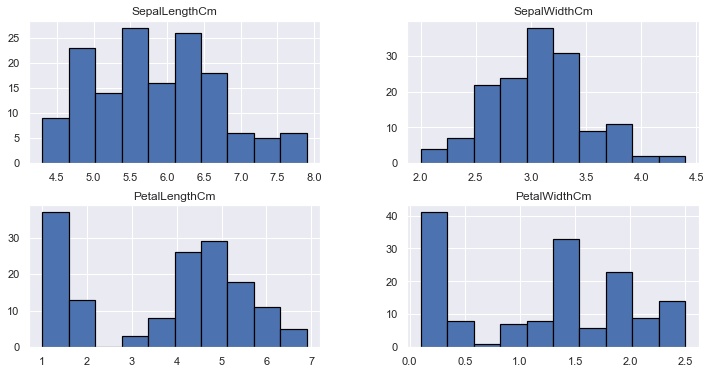

In [13]:
# The distribution plot is suitable for comparing range and distribution for groups of numerical data. 
sns.set(style="darkgrid")
iris_df.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)

##### Plotting Pair plot

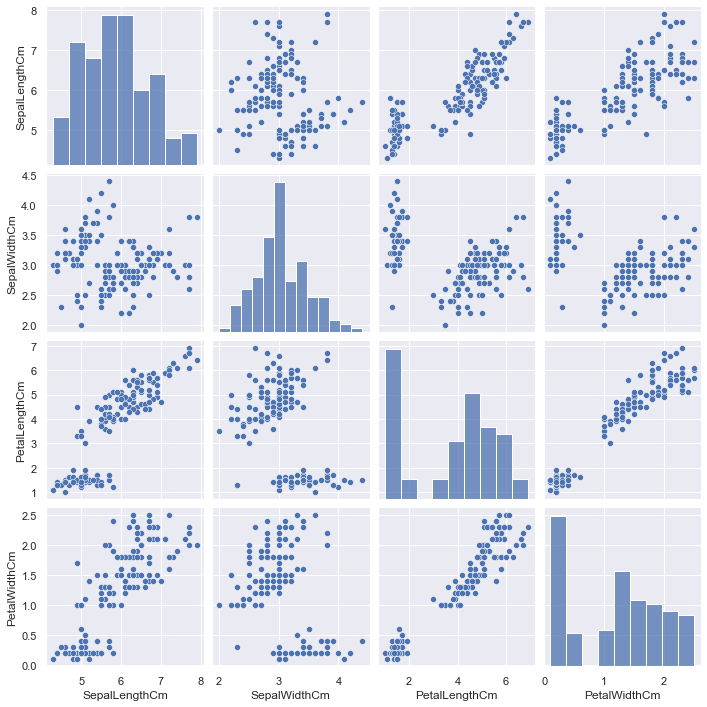

In [14]:
sns.pairplot(data=iris_df,kind='scatter');

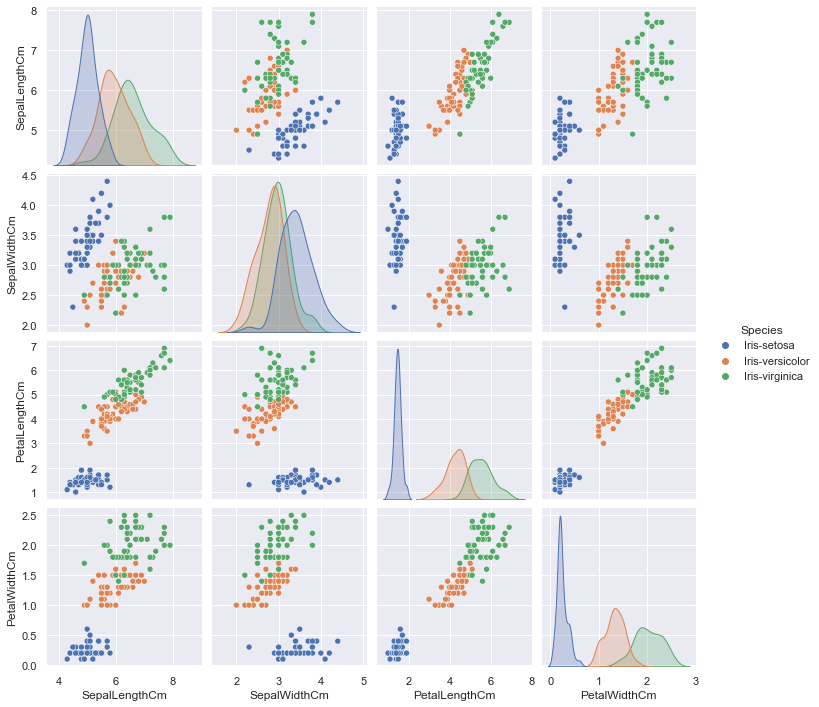

In [15]:
sns.pairplot(iris_df,hue='Species');

###### Scatter Plot

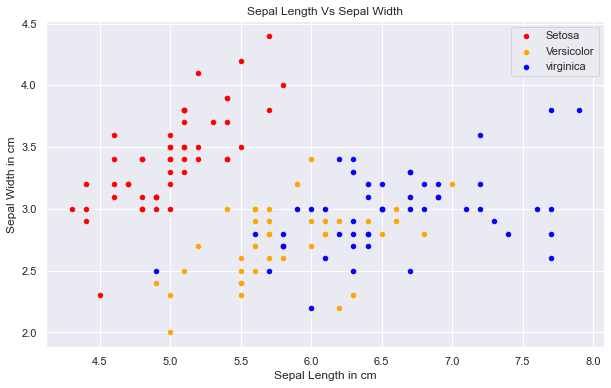

In [16]:
# Different colors represent different group of species
sns.set(style="darkgrid")
sc=iris_df[iris_df.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='red',label='Setosa')
iris_df[iris_df.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange',label='Versicolor',ax=sc)
iris_df[iris_df.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='virginica', ax=sc)
sc.set_xlabel('Sepal Length in cm')
sc.set_ylabel('Sepal Width in cm')
sc.set_title('Sepal Length Vs Sepal Width')
sc=plt.gcf()
sc.set_size_inches(10,6)

###### Plotting Heat Map

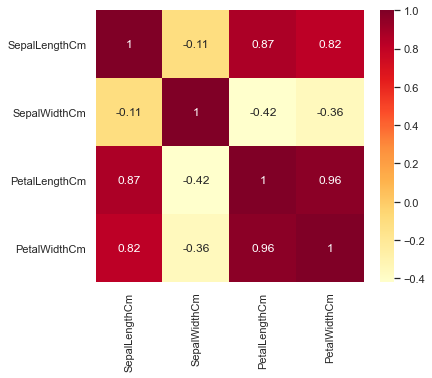

In [17]:
fig=plt.gcf()
fig.set_size_inches(6,5)
sns.heatmap(iris_df.corr(),annot=True,cmap="YlOrRd",mask=False);

###### Now we will implement 'The elbow method' on the Iris dataset. The elbow method allows us to pick the optimum amount of clusters for classification. although we already know the answer is 3 it is still interesting to run.

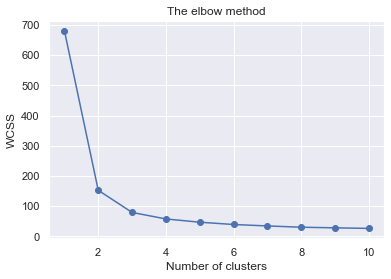

In [18]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans

x = iris_df.iloc[:, [0,1, 2, 3]].values
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss,'o-')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

###### You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

##### From this we choose the number of clusters as ** '3**'.

### The K-means Model

In [19]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

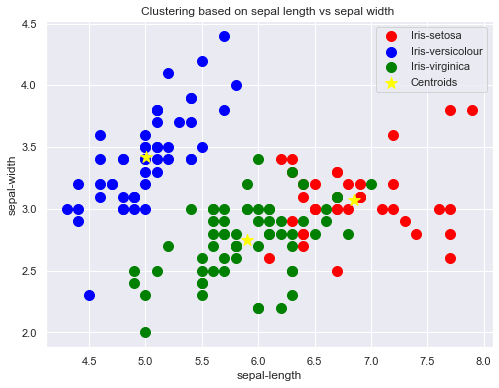

In [20]:
# Visualising the clusters
plt.figure(figsize=[8,6])
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 150, c = 'yellow',marker='*', label = 'Centroids')
plt.title('Clustering based on sepal length vs sepal width ')
plt.xlabel('sepal-length')
plt.ylabel('sepal-width')
plt.legend();


##### visualizing the Petal Length and Petal Width

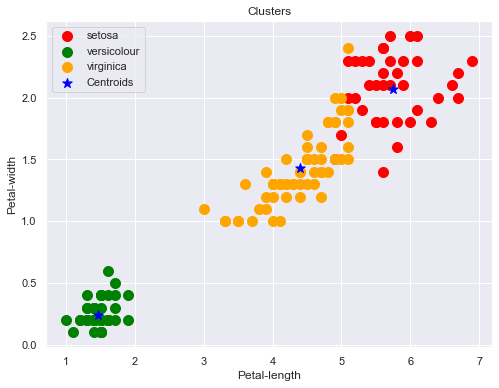

In [21]:
plt.figure(figsize=[8,6])
plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3],s = 100, c = 'red', label = 'setosa')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3],s = 100, c = 'green', label = 'versicolour')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3],s = 100, c = 'orange', label = 'virginica')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3],s = 100, c = 'blue',marker='*', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Petal-length')
plt.ylabel('Petal-width')
plt.legend();

#### visualizing the sepal length and sepal width

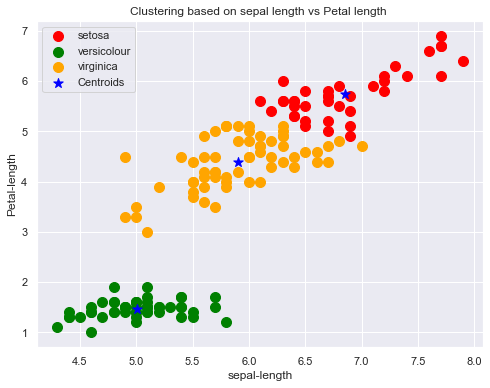

In [22]:
plt.figure(figsize=[8,6])
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 2],s = 100, c = 'red', label = 'setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 2],s = 100, c = 'green', label = 'versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 2],s = 100, c = 'orange', label = 'virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,2],s = 100, c = 'blue',marker='*', label = 'Centroids')
plt.title('Clustering based on sepal length vs Petal length ')
plt.xlabel('sepal-length')
plt.ylabel('Petal-length')
plt.legend();

###### ===========================================================================================================================